# Projeto python para DataScience: gerando insights

## ⬇️ Importando os dados

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 Verificando as bases de dados

In [ ]:
df_pedidos = pd.read_csv('/content/drive/MyDrive/Dados/Projeto Python da DS/pedidos')
df_pedidos.head()

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,3855.81
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,5305.57
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,18094.91
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,14052.66
4,6006,2025-02-09,C6005,RS,Porto Alegre,Cartão de débito,Não,13386.82


In [ ]:
df_itens_pedido = pd.read_csv('/content/drive/MyDrive/Dados/Projeto Python da DS/itens_pedido')
df_itens_pedido.head()

,pedido_id,categoria_produto,nome_produto,preco_unitario,quantidade
0,6025,Livros,Ficção Científica,43.23,2.0
1,6035,Livros,Ficção Científica,223.79,1.0
2,6035,Livros,Biografia,81.01,2.0
3,6046,Livros,Ficção Científica,205.33,2.0
4,6064,Livros,Romance,387.79,2.0


## 📋 Ticket médio

🎯 O que é Ticket Médio?

✅ Ticket médio é o valor médio que um cliente gasta em um pedido, compra ou transação.

👉 Fórmula:

$$
\text{Ticket Médio} = \frac{\text{Valor Total das Vendas}}{\text{Número de Pedidos}}
$$



In [ ]:
def ticket_medio(df, col_valor, col_pedido):
    total_vendas = df[col_valor].sum()
    num_pedidos = df[col_pedido].nunique()
    tm = total_vendas / num_pedidos
    return tm

In [ ]:
ticket_medio = ticket_medio(df_pedidos,'valor_total','pedido_id')

In [ ]:
ticket_medio

np.float64(9812.66244575937)

### Ticket médio por estado

In [ ]:
def ticket_medio_por_grupo(df, col_valor, col_pedido, col_grupo):
    resultados = {}
    for grupo, dados in df.groupby(col_grupo):
        total_vendas = dados[col_valor].sum()
        num_pedidos = dados[col_pedido].nunique()
        tm = total_vendas / num_pedidos if num_pedidos > 0 else 0
        resultados[grupo] = tm
    return resultados

In [ ]:
estados = df_pedidos.groupby(['estado','pedido_id'])['valor_total'].sum().reset_index()

In [ ]:
estados

,estado,pedido_id,valor_total
0,AM,6029,12149.88
1,AM,6032,3669.73
2,AM,6033,7009.98
3,AM,6038,15551.17
4,AM,6039,18718.17
...,...,...,...
6079,SP,12955,7060.24
6080,SP,12965,14046.06
6081,SP,12973,715.90
6082,SP,12978,22193.56


In [ ]:
ticket_medio_estado = ticket_medio_por_grupo(estados,'valor_total','pedido_id','estado')

In [ ]:
ticket_medio_estado

{'AM': np.float64(9840.660794602698),
 'BA': np.float64(9844.799521604938),
 'CE': np.float64(9682.854697674418),
 'MG': np.float64(9468.901531291613),
 'PE': np.float64(10153.914204379562),
 'PR': np.float64(9432.213729071536),
 'RJ': np.float64(10096.283333333333),
 'RS': np.float64(9852.508392036752),
 'SP': np.float64(9950.279004457652)}

### Ticket médio por categoria de produto

In [ ]:
categoria = df_itens_pedido.groupby('pedido_id')['categoria_produto'].first().reset_index()

In [ ]:
valor_pedido = df_pedidos.groupby('pedido_id')['valor_total'].sum().reset_index()

In [ ]:
valor_pedido = valor_pedido.merge(categoria, on='pedido_id', how='left')

In [ ]:
valor_pedido

,pedido_id,valor_total,categoria_produto
0,6001,3855.81,Eletrônicos
1,6002,5305.57,Casa
2,6003,18094.91,Eletrônicos
3,6004,14052.66,Casa
4,6006,13386.82,Moda
...,...,...,...
6079,12996,5165.94,Casa
6080,12997,2597.43,Eletrônicos
6081,12998,23563.02,Eletrônicos
6082,12999,9358.81,Casa


In [ ]:
def ticket_medio_por_grupo(df, col_valor, col_pedido, col_grupo):
    resultados = {}
    for grupo, dados in df.groupby(col_grupo):
        total_vendas = dados[col_valor].sum()
        num_pedidos = dados[col_pedido].nunique()
        tm = total_vendas / num_pedidos if num_pedidos > 0 else 0
        resultados[grupo] = tm
    return resultados

In [ ]:
ticket_medio_por_categoria = ticket_medio_por_grupo(valor_pedido,'valor_total','pedido_id','categoria_produto')

In [ ]:
ticket_medio_por_categoria

{'Casa': np.float64(9606.193085227273),
 'Eletrônicos': np.float64(11799.100086237873),
 'Esporte': np.float64(3934.559484126984),
 'Livros': np.float64(7911.751478494624),
 'Moda': np.float64(6566.807426390404)}

### Ticket médio por forma de pagamento

In [ ]:
forma_pagamento = df_pedidos.groupby(['pedido_id','forma_pagamento'])['valor_total'].sum().reset_index()

In [ ]:
ticket_medio_por_pagamento = ticket_medio_por_grupo(forma_pagamento,'valor_total','pedido_id','forma_pagamento')

In [ ]:
ticket_medio_por_pagamento

{'Boleto': np.float64(10068.963722527473),
 'Cartão de crédito': np.float64(9734.08142857143),
 'Cartão de débito': np.float64(9658.291243523316),
 'Pix': np.float64(9802.783239616612)}

### Ticket médio por atraso na entrega

In [ ]:
atraso = df_pedidos.groupby(['pedido_id','entregue_no_prazo'])['valor_total'].sum().reset_index()

In [ ]:
ticket_medio_por_atraso = ticket_medio_por_grupo(atraso, 'valor_total', 'pedido_id', 'entregue_no_prazo')

In [ ]:
ticket_medio_por_atraso

{'Não': np.float64(9943.333595206392), 'Sim': np.float64(9685.21564935065)}

## 🛍️ Pedidos

### Pedido de maior valor

In [ ]:
pedido_valor = df_pedidos.groupby('pedido_id')['valor_total'].sum().reset_index()
pedido_max = pedido_valor.loc[pedido_valor['valor_total'].idxmax()]
pedido_max

,3648
pedido_id,10214.00
valor_total,49970.29


### Pedido de menor valor

In [ ]:
pedido_min = pedido_valor.loc[pedido_valor['valor_total'].idxmin()]
pedido_min

,5044
pedido_id,11821.00
valor_total,35.78


### Quantidade de itens nos pedido

In [ ]:
qtd_itens = df_itens_pedido.groupby('pedido_id')['quantidade'].sum()
qtd_itens

,quantidade
pedido_id,
6001,1.0
6002,4.0
6003,5.0
6004,6.0
6006,4.0
...,...
12996,2.0
12997,3.0
12998,6.0


### Media de itens por pedido

In [ ]:
total_itens = df_itens_pedido['quantidade'].sum()
num_pedidos = df_itens_pedido['pedido_id'].nunique()

media_itens_pedido = total_itens / num_pedidos
media_itens_pedido

np.float64(4.153681788297173)

### quantidade de pedidos com apenas 1 item

In [ ]:
quantidade_por_pedido = df_itens_pedido.groupby('pedido_id')['quantidade'].sum()
pedidos_apenas_um_item = len(quantidade_por_pedido[quantidade_por_pedido == 1])
pedidos_apenas_um_item

764

## 🔀 Frequência

### quantidade de pedidos por estado

In [ ]:
quantidade_por_estado = df_pedidos.groupby('estado')['pedido_id'].count()
quantidade_por_estado

,pedido_id
estado,
AM,667
BA,648
CE,645
MG,751
PE,685
PR,657
RJ,705
RS,653
SP,673


### quantidade de pedidos por cidade

In [ ]:
quantidade_por_cidade = df_pedidos.groupby('cidade')['pedido_id'].count().sort_values(ascending=False).reset_index()
quantidade_por_cidade

,cidade,pedido_id
0,Belo Horizonte,258
1,Uberlândia,257
2,Niterói,249
3,Recife,241
4,Juazeiro do Norte,237
5,Rio de Janeiro,236
6,Contagem,236
7,Parintins,235
8,Londrina,231
9,Campinas,230


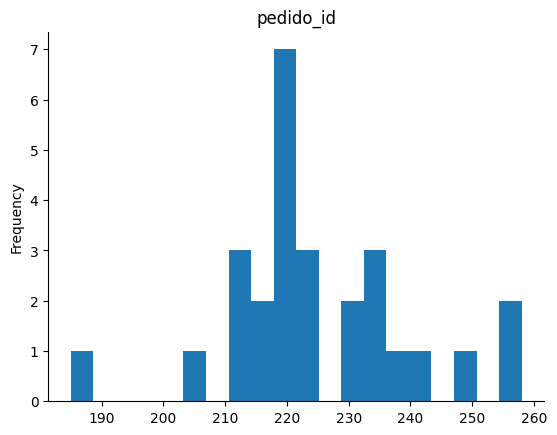

In [ ]:
# @title gráfico

from matplotlib import pyplot as plt
quantidade_por_cidade['pedido_id'].plot(kind='hist', bins=20, title='pedido_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Ranking das 5 cidades com maior numero de pedidos

In [ ]:
top_5 = quantidade_por_cidade[:5]
top_5

,cidade,pedido_id
0,Belo Horizonte,258
1,Uberlândia,257
2,Niterói,249
3,Recife,241
4,Juazeiro do Norte,237
